In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from yellowbrick.cluster import KElbowVisualizer
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage

import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")

# EDA Analize

In [28]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [29]:
df.shape

(4194, 181)

In [30]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [31]:
df.columns

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Customers.create_date', 'Customers.status',
       'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt',
       'Customers.account_id',
       ...
       'Products.google_shopping_label', 'Products.product_option',
       'Products.size', 'Products.material', 'Products.arm_style',
       'Products.leg_style', 'Products.seat_size', 'Products.family_id',
       'Products.saved_status', 'Products.freight_cost'],
      dtype='object', length=181)

In [32]:
x=df[['Customers.id','Order_Items.id','Products.id']]

In [33]:
x.isnull().sum()

Customers.id        0
Order_Items.id      0
Products.id       157
dtype: int64

In [34]:
x = x.dropna(subset=['Products.id'])

In [35]:
x.isnull().sum()

Customers.id      0
Order_Items.id    0
Products.id       0
dtype: int64

In [36]:
wcss=[] #Dirsek Noktasını Hesaplama
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [37]:
wcss 

[267663672893.8659,
 130772881001.45468,
 46619451232.56646,
 37647452784.238495,
 29516823687.634945,
 23867490437.16276,
 20051644199.057327,
 17793032584.868,
 15657803712.991898]

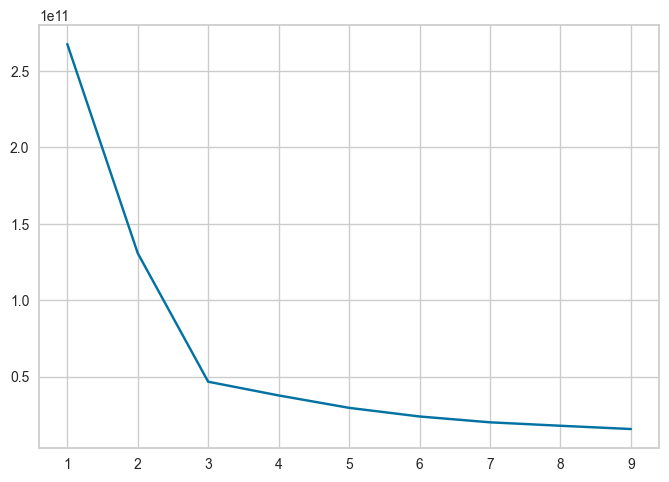

In [38]:
plt.plot(range(1,10),wcss)

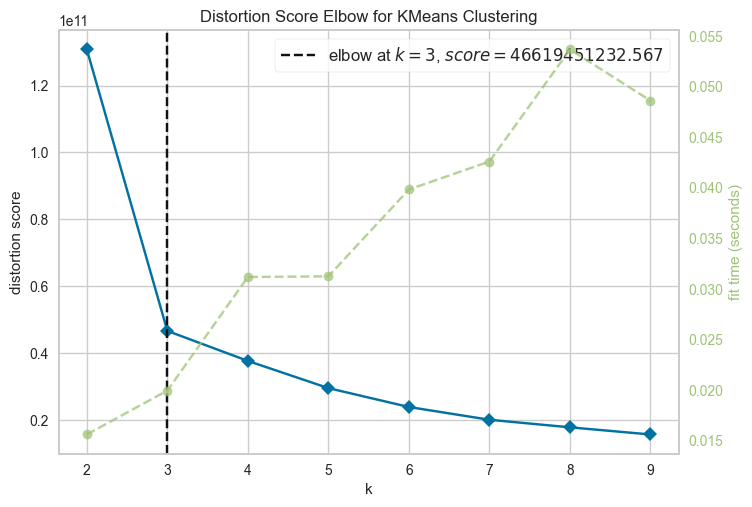

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
km = KMeans()
visualizer = KElbowVisualizer(km,k=(2,10))
visualizer.fit(x)
visualizer.show()

In [40]:
model = KMeans(3)

In [41]:
model=model.fit(x)

In [42]:
Tahmin = model.predict(x)

In [43]:
x["Cluster"]=Tahmin

In [44]:
x.rename(columns = {'Customers.id':'CustomerID'}, inplace = True)
x.rename(columns = {'Order_Items.id':'OrderItemId'}, inplace = True)
x.rename(columns = {'Products.id':'ProductsId'}, inplace = True)

In [45]:
x.head()

,CustomerID,OrderItemId,ProductsId,Cluster
0,797,5284,2310.0,0
1,3,31,177.0,0
2,3,11655,1.0,2
3,4,1816,983.0,0
4,5,40,991.0,0


## Data Visulation

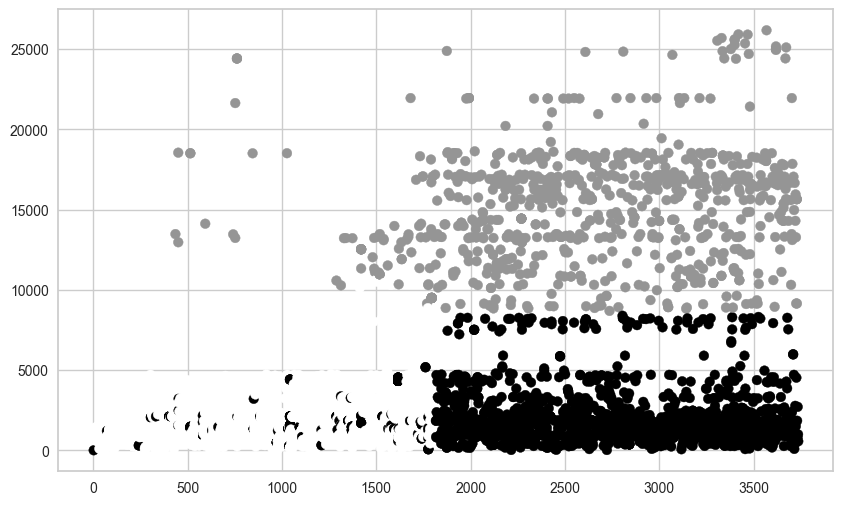

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(x.CustomerID,x.ProductsId,c=Tahmin)

In [47]:
data=linkage(x,method='ward',metric='euclidean')

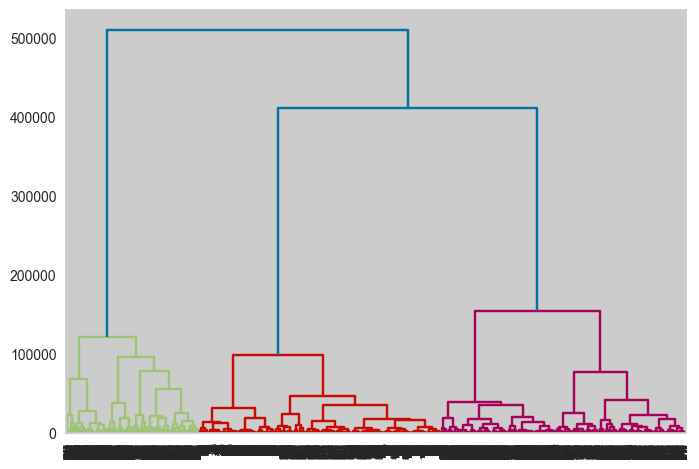

In [48]:
dendrogram(data);

In [56]:
df.groupby('Customers.id')['Orders.payment_date'].max()

Customers.id
3      1970-01-01 00:00:01.449603652
4      1970-01-01 00:00:01.386780263
5      1970-01-01 00:00:01.410363655
7      1970-01-01 00:00:01.388155947
8      1970-01-01 00:00:01.389647443
                    ...             
3730   1970-01-01 00:00:01.463408854
3732   1970-01-01 00:00:01.463412757
3733   1970-01-01 00:00:01.463413246
3735   1970-01-01 00:00:01.463416694
3736   1970-01-01 00:00:01.463418095
Name: Orders.payment_date, Length: 3054, dtype: datetime64[ns]

## RFM analysis

In [63]:
from datetime import datetime
now=datetime.today()
now =  pd.to_datetime(now.strftime("%d/%m/%Y %H:%M:%S"))
now

Timestamp('2023-10-20 08:51:01')

In [64]:

df['Orders.payment_date'] = pd.to_datetime(df['Orders.payment_date'])
recency = now - df.groupby('Customers.id')['Orders.payment_date'].max()
recency = recency.dt.days
frequency = df.groupby('Customers.id')['Orders.payment_date'].count()
monetary = df.groupby('Customers.id')['Orders.subtotal'].sum()

In [65]:
# Create an RFM DataFrame
rfm_df = pd.DataFrame({
'Recency': recency,
'Frequency': frequency,
'Monetary': monetary
})

In [66]:
print(rfm_df)

              Recency  Frequency  Monetary
Customers.id                              
3             19650.0          2     88.78
4             19650.0          1     19.56
5             19650.0          2     95.14
7             19650.0          1     39.19
8             19650.0          1     59.75
...               ...        ...       ...
3730          19650.0          1     14.85
3732          19650.0          1     39.99
3733          19650.0          1   1099.00
3735          19650.0          1    129.99
3736          19650.0          1     24.54

[3054 rows x 3 columns]
